In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
from gammapy.irf import EffectiveAreaTable
from gammapy.irf import EnergyDispersion2D

In [83]:
scaled_file = 'irf_south_bracketed/CTA-Performance-South-20deg-N-05h_20170627.fits.gz'
classical_file = 'irf_south/CTA-Performance-South-20deg-N-05h_20170627.fits.gz'

# New IRF
scaled = fits.open(scaled_file)
aeff_new = EffectiveAreaTable.from_hdulist(scaled)
edisp_new = EnergyDispersion2D.read(scaled_file, hdu='ENERGY DISPERSION')
rmf_new = edisp_new.to_energy_dispersion(offset=0.5 * u.deg)

# Original IRF
orig = fits.open(classical_file)
aeff = EffectiveAreaTable.from_hdulist(orig)
edisp = EnergyDispersion2D.read(classical_file, hdu='ENERGY DISPERSION')
rmf = edisp.to_energy_dispersion(offset=0.5 * u.deg)

In [84]:
ratio = aeff_new.data.data / aeff.data.data
ratio

<Quantity [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
           0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
           0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
           0.5, 0.5, 0.5]>

<Quantity [0.99999999, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
           0.99999997, 0.99999997, 0.99999997, 0.99999997, 1.        ,
           1.        , 1.        , 0.99999999, 0.99999999, 0.99999999,
           0.99999999, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
           1.00000003, 1.00000003, 1.00000003, 1.00000003, 1.00000004,
           1.00000004, 1.00000004, 1.00000004, 1.        , 1.        ,
           1.        , 1.        , 0.99999998, 0.99999998, 0.99999998,
           0.99999998, 1.        , 1.        , 1.        , 1.        ,
           0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999975,
           0.99999975, 0.99999975, 0.99999975, 0.99999997, 0.99999997,
           0.99999997, 0.99999997, 1.0000002 , 1.0000002 , 1.0000002 ,
           1.0000002 , 1.00000039, 1.00000039, 1.00000039, 1.00000039,
           0.9999998 , 0.9999998 , 0.9999998 , 0.9999998 , 0.99999983,
           0.99999983, 0.99999983, 0.99999983, 1.00000028, 1.00000028,
      

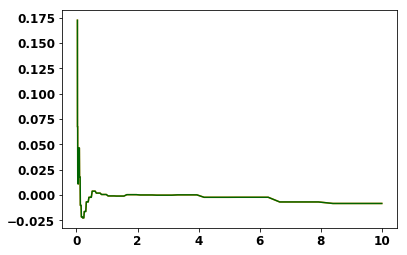

In [85]:
energy = np.logspace(-1.5,1, 100) * u.TeV
bias_new = rmf_new.get_bias(energy)
bias = rmf.get_bias(energy)
plt.plot(energy.value, bias_new, c='darkorange')
plt.plot(energy.value, bias, c='darkgreen')
bias_new/bias

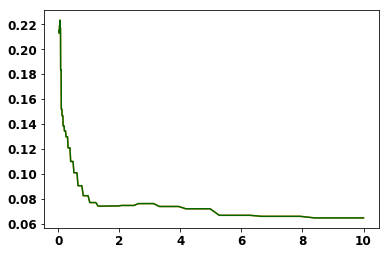

In [86]:
energy = np.logspace(-1.5,1, 100) * u.TeV
resol_new = rmf_new.get_resolution(energy)
resol = rmf.get_resolution(energy)
plt.plot(energy.value, resol_new, c='darkorange')
plt.plot(energy.value, resol, c='darkgreen')

In [87]:
resol_new/resol

<Quantity [1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
           1.        , 1.        , 1.        , 1.        , 1.        ,
      

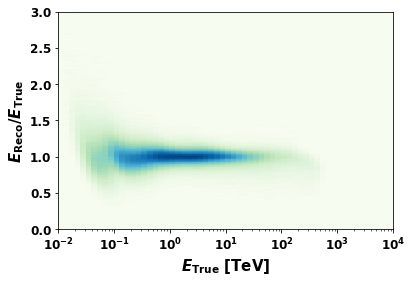

In [76]:
edisp_new.plot_bias()

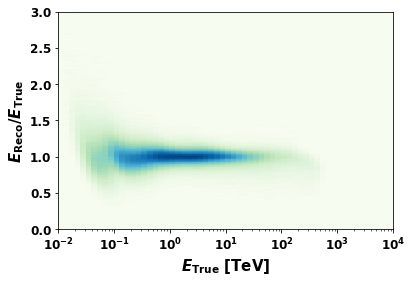

In [88]:
edisp.plot_bias()

In [100]:
scaled[3].name

'ENERGY DISPERSION'

In [99]:
orig[3].name

'ENERGY DISPERSION'